## Leaf Infection Detection

This project analyzes leaf images to detect and calculate the percentage of infected areas. It uses edge detection (via the Canny algorithm) to separate the leaf from the background (assuming we have white background), applies Otsu’s thresholding to identify infected regions, and then overlays the infected areas on the original image. The project utilizes Python libraries like OpenCV, scikit-image, and matplotlib for image processing, thresholding, and visualization. It handles multiple images and outputs the infected area percentage for each.

Infected Area Percentage: 0.25%


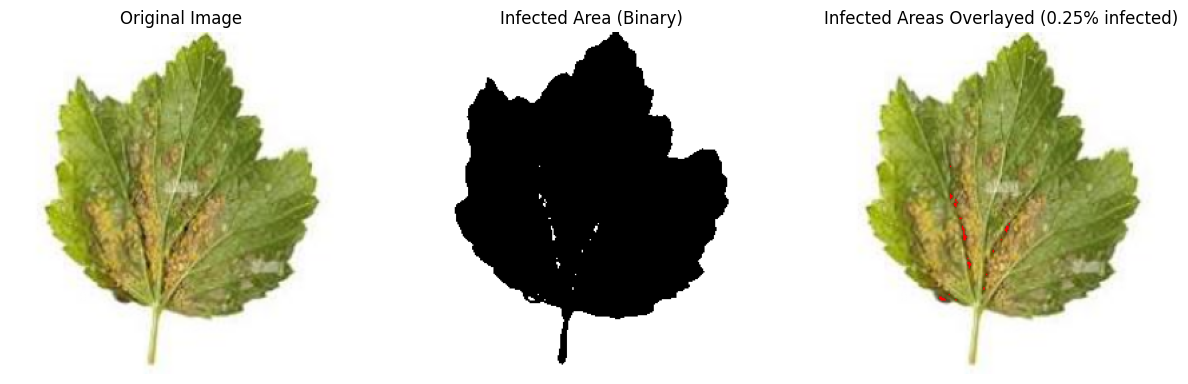

Infected Area Percentage: 7.68%


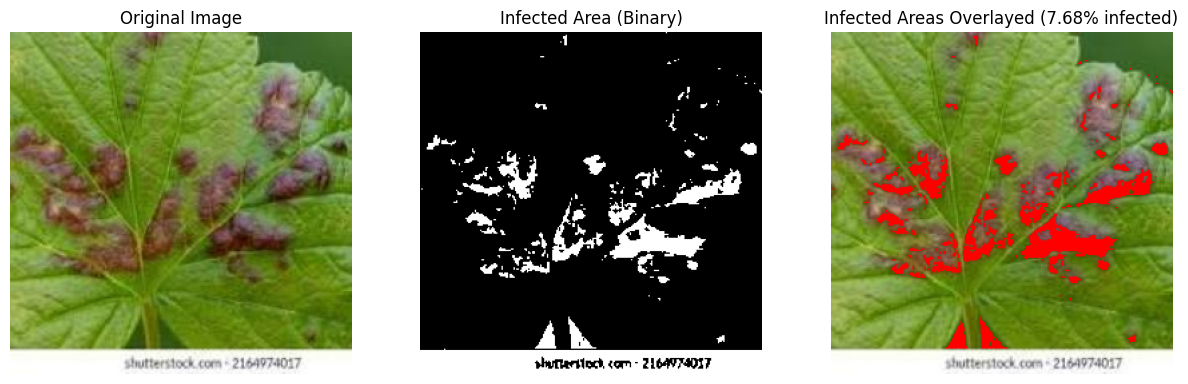

Infected Area Percentage: 29.48%


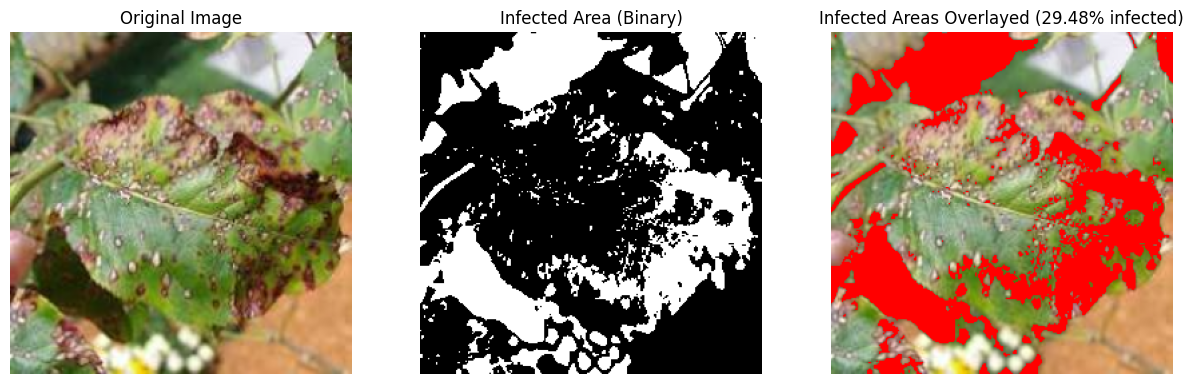

Infected Area Percentage: 63.64%


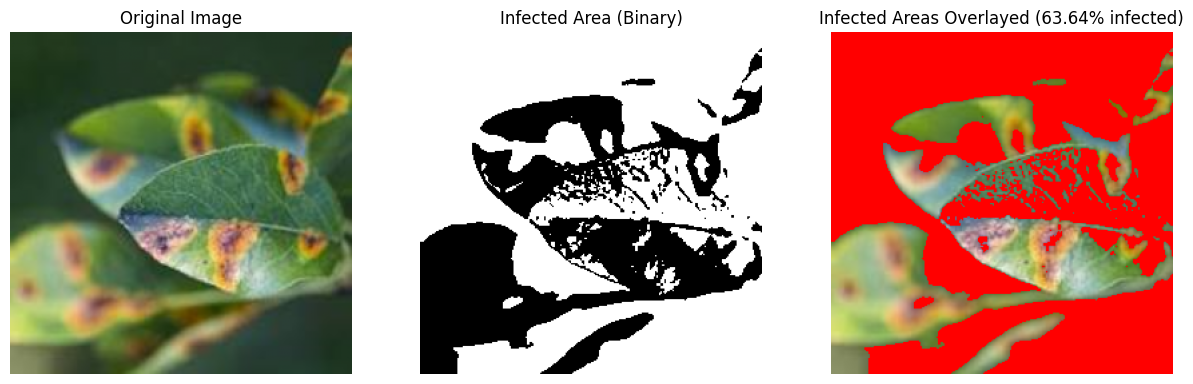

In [19]:
import numpy as np
import cv2 as cv
from skimage import io, color, filters, measure
from skimage.transform import resize
from skimage.feature import canny
from matplotlib import pyplot as plt

def process_image(image_path):
    image = io.imread(image_path)
    
    image_resized = resize(image, (256, 256), anti_aliasing=True)
    
    if len(image_resized.shape) == 3:
        image_gray = color.rgb2gray(image_resized)
    else:
        image_gray = image_resized
    
    image_hsv = cv.cvtColor((image_resized * 255).astype(np.uint8), cv.COLOR_RGB2HSV)
    lower_white = np.array([0, 0, 200])
    upper_white = np.array([255, 50, 255])
    

    mask = cv.inRange(image_hsv, lower_white, upper_white)
    mask = cv.bitwise_not(mask)
    
    leaf_extracted = cv.bitwise_and(image_resized, image_resized, mask=mask)
    
    leaf_gray = color.rgb2gray(leaf_extracted)
    
    thresh_value = filters.threshold_otsu(leaf_gray)
    infected_area = leaf_gray < thresh_value

    edges = canny(leaf_gray)

    healthy_area = ~infected_area
    labeled_image = measure.label(healthy_area)
    region_props = measure.regionprops(labeled_image)
    
    total_leaf_area = np.sum(mask > 0)
    infected_pixels = np.sum(infected_area & (mask > 0))
    infected_percentage = (infected_pixels / total_leaf_area) * 100
    
    print(f"Infected Area Percentage: {infected_percentage:.2f}%")
    

    infected_overlay = np.copy(image_resized)
    infected_overlay[infected_area & (mask > 0)] = [1, 0, 0]
    
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    
    ax[0].imshow(image_resized)
    ax[0].set_title('Original Image')
    ax[0].axis('off')

    ax[1].imshow(infected_area, cmap='gray')
    ax[1].set_title('Infected Area (Binary)')
    ax[1].axis('off')

    ax[2].imshow(infected_overlay)
    ax[2].set_title(f'Infected Areas Overlayed ({infected_percentage:.2f}% infected)')
    ax[2].axis('off')

    plt.show()

image_paths = ['leaf1.jpeg', 'leaf2.jpeg']
for image_path in image_paths:
    process_image(image_path)
